In [2]:
##Step 1
## Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
## Importing Data set ords_prods_merge
df = pd.read_pickle(r'/Users/javieraquezada/Desktop/05-2025 Instacart Basket Analysis/02 Data/Prepared Data/final_dataset.pkl')

In [4]:
##Creating Path
path = r'/Users/javieraquezada/Desktop/05-2025 Instacart Basket Analysis'

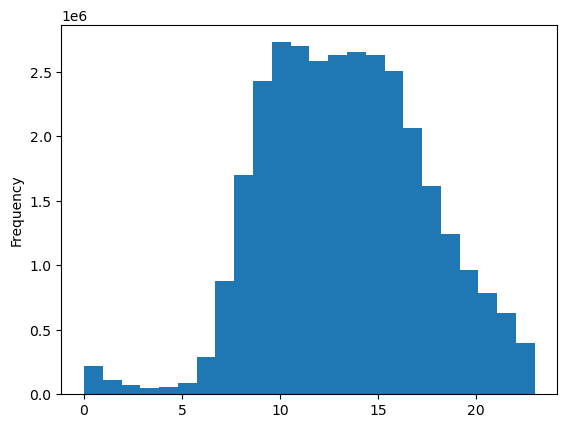

In [5]:
#Step 3
##Creating historgram for the order_hour_of_day column
order_hour_hist=df['order_hour_of_day'].plot.hist(bins = 24)

In [6]:
##It seams to be a peak in orders arriving to mid day and after mid day, going down around 16h
## We could say that highest order times woulf be from 11h to 15h

In [7]:
## Exporting
## Exporting histogram outside of Jupyter in the form of an image file.
order_hour_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ords_hour_hist4.9.2.png'))

<Axes: xlabel='loyalty_flag'>

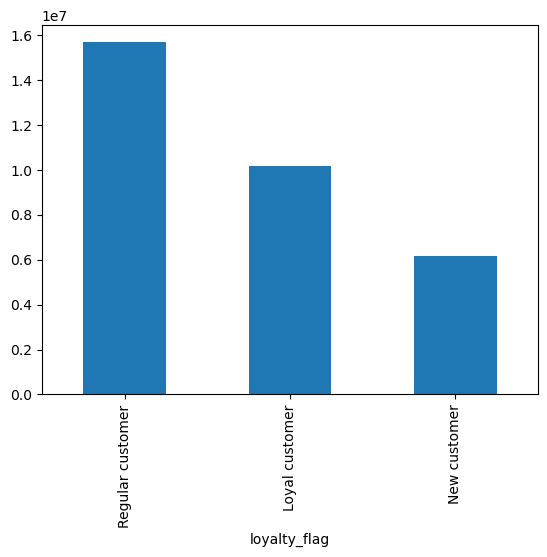

In [8]:
##Creating Bar Charts
df['loyalty_flag'].value_counts().plot.bar()

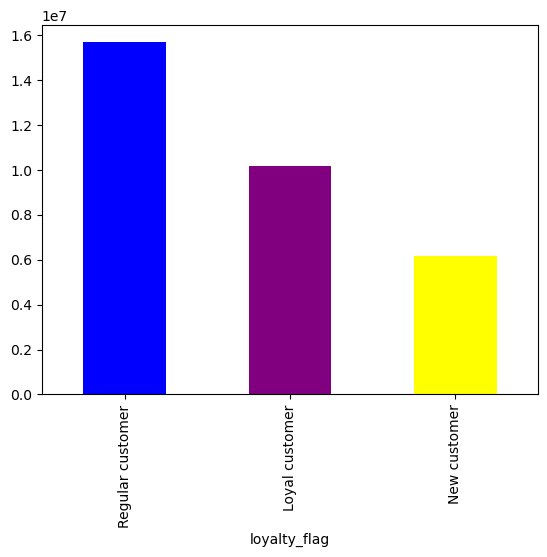

In [9]:
## Changing color
bar_loyalty = df['loyalty_flag'].value_counts().plot.bar(color=['blue','purple','yellow'])

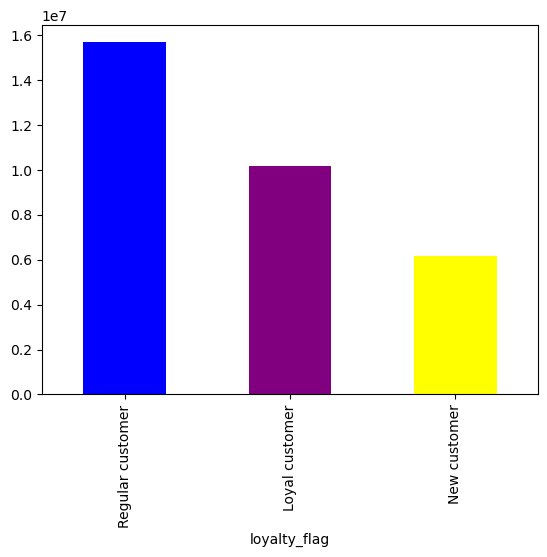

In [10]:
## Exporting
bar_loyalty.figure

In [11]:
## Exporting histogram outside of Jupyter in the form of an image file.
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.4.9.2.png'))

In [12]:
## Step 5
##Creating Line Charts
## Sampling data for this specific situation due to the size of the data set and subseting not being enough representative of the entire population.
## due to selection of rows should be randomized

In [13]:
#Creating a sample of the dataframe
sampled_df = df.sample(n=100000, random_state=1)

In [14]:
##Consistency checks
sampled_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
22126022,1398830,142475,13,2,21,8.0,36865,5,1,both,...,Regular customer,Ernest,Benjamin,Male,Oregon,73,2019-04-17,2,married,134884
13611120,467064,87348,28,0,16,4.0,39619,28,1,both,...,Frequent customer,Lois,Lee,Female,Minnesota,56,2017-02-19,0,single,106266
23047102,2554675,148378,2,6,11,19.0,14536,9,0,both,...,Regular customer,Andrew,Beil,Male,Louisiana,80,2018-08-21,1,married,158967
25904546,2577269,166917,39,2,6,4.0,5737,16,1,both,...,Frequent customer,Jane,Bernard,Female,Utah,26,2019-04-28,2,married,52587
28106908,1446039,181141,1,1,12,NaN,18487,6,0,both,...,Non-frequent customer,NaN,Faulkner,Female,Rhode Island,73,2018-01-28,2,married,168457


In [15]:
## Consinstency Checks
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 22126022 to 13794264
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100000 non-null  int64         
 1   user_id                        100000 non-null  int64         
 2   order_number                   100000 non-null  int64         
 3   orders_day_of_week             100000 non-null  int64         
 4   order_hour_of_day              100000 non-null  int64         
 5   days_since_prior_order         93553 non-null   float64       
 6   product_id                     100000 non-null  int64         
 7   add_to_cart_order              100000 non-null  int64         
 8   reordered                      100000 non-null  int64         
 9   _merge                         100000 non-null  category      
 10  product_name                   100000 non-null  object        
 

In [136]:
#group by hour of the day and calculate the mean expenditure
hourly_expenditure = sampled_df.groupby('order_hour_of_day')['prices'].mean().reset_index()

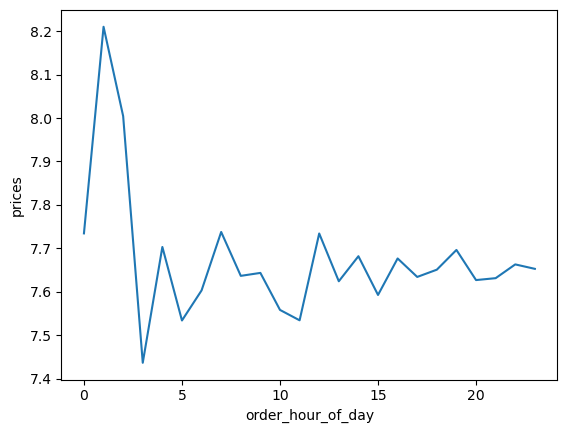

In [137]:
#creating a line chart
line_price_hours = sns.lineplot(data = hourly_expenditure, x = 'order_hour_of_day', y = 'prices')

In [138]:
## Exporting line chart outside of Jupyter in the form of an image file.
line_price_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_hours.4.9.2.png'))

In [139]:
##Step 6. Finding relation between family situation and age.

In [143]:
## Change of column name to a more intuitive one
sampled_df.rename(columns={'n_dependants': 'number_of_dependants'}, inplace=True)

In [144]:
##Checking fot the name change
sampled_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,number_of_dependants,fam_status,income
22126022,1398830,142475,13,2,21,8.0,36865,5,1,both,...,Regular customer,Ernest,Benjamin,Male,Oregon,73,2019-04-17,2,married,134884
13611120,467064,87348,28,0,16,4.0,39619,28,1,both,...,Frequent customer,Lois,Lee,Female,Minnesota,56,2017-02-19,0,single,106266
23047102,2554675,148378,2,6,11,19.0,14536,9,0,both,...,Regular customer,Andrew,Beil,Male,Louisiana,80,2018-08-21,1,married,158967
25904546,2577269,166917,39,2,6,4.0,5737,16,1,both,...,Frequent customer,Jane,Bernard,Female,Utah,26,2019-04-28,2,married,52587
28106908,1446039,181141,1,1,12,NaN,18487,6,0,both,...,Non-frequent customer,NaN,Faulkner,Female,Rhode Island,73,2018-01-28,2,married,168457


In [149]:
# Group by age and calculating the average number of dependents
age_dependents = sampled_df.groupby('age')['number_of_dependants'].mean().reset_index()

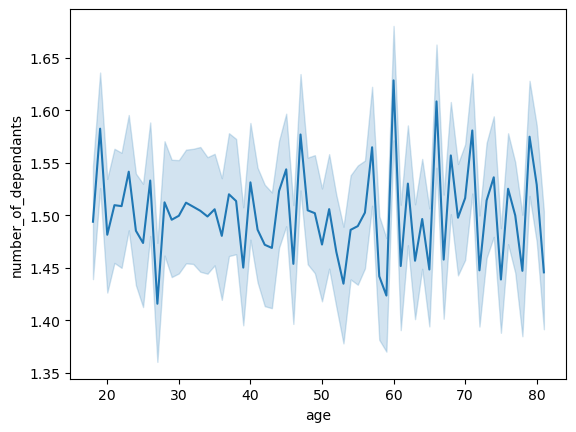

In [153]:
#Creating the line chart 
line_dependants= sns.lineplot(data = sampled_df, x = 'age', y = 'number_of_dependants')

In [ ]:
## Chart shows that people that has between 60 and 70 years tend to have more dependants

In [154]:
## Exporting line chart outside of Jupyter in the form of an image file.
line_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dependants.4.9.2.png'))

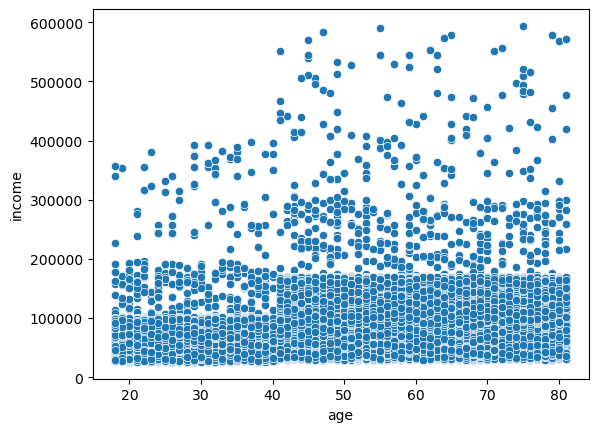

In [155]:
## Step:7 creating a scatterplot of 'Age' and 'Income'
scatter_income_age = sns.scatterplot(x='age', y='income', data=sampled_df)

In [ ]:
## Scatterplot, doesnt show a clear correlation between variables.

In [156]:
## Exporting line chart outside of Jupyter in the form of an image file.
scatter_income_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_income_age.4.9.2.png'))

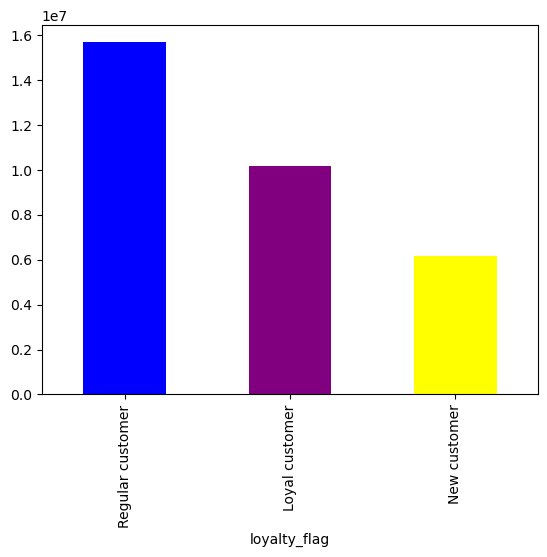

In [16]:
## Improving Viz
bar_loyalty = df['loyalty_flag'].value_counts().plot.bar(color=['blue','purple','yellow'])

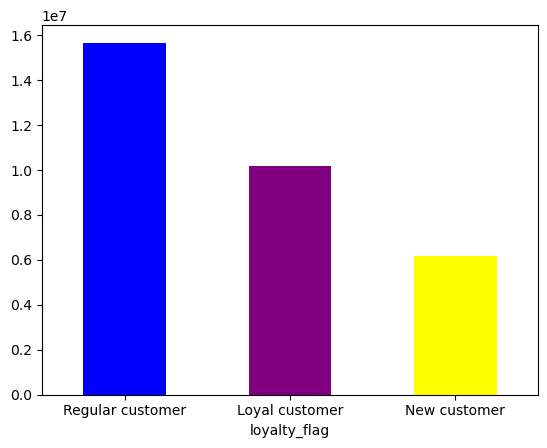

In [17]:
bar_loyalty = df['loyalty_flag'].value_counts().plot.bar(color=['blue', 'purple', 'yellow'])

plt.xticks(rotation=0)  # Set rotation to 0 for horizontal labels

plt.show()

In [18]:
## Exporting histogram outside of Jupyter in the form of an image file.
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.4.9.2.png'))

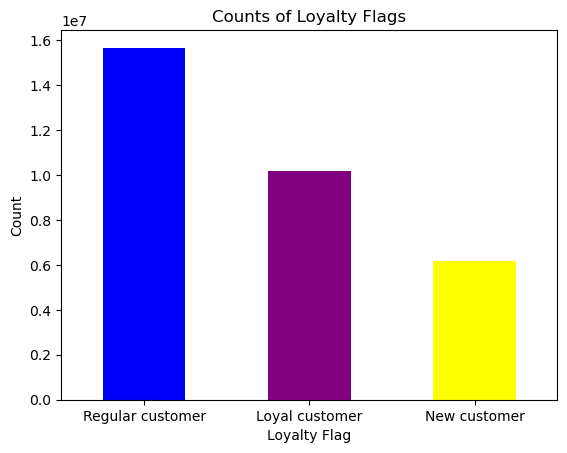

In [19]:
bar_loyalty = df['loyalty_flag'].value_counts().plot.bar(color=['blue', 'purple', 'yellow'])

plt.xticks(rotation=0)           # Horizontal x-axis labels
plt.ylabel('Count')              # Y-axis label
plt.xlabel('Loyalty Flag')       # X-axis label (optional)
plt.title('Counts of Loyalty Flags')  # Title (optional)

plt.show()

In [20]:
## Exporting histogram outside of Jupyter in the form of an image file.
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.4.9.2.png'))

In [22]:
# Get the counts (not the plot)
loyalty_counts = df['loyalty_flag'].value_counts()

# Print the raw output
print(loyalty_counts)

loyalty_flag
Regular customer    15664686
Loyal customer      10164157
New customer         6158338
Name: count, dtype: int64
